In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [2]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back)]
        dataX.append(a)
        dataY.append(dataset[i+look_back])
    return np.array(dataX), np.array(dataY)

In [3]:
np.random.seed(7)

In [4]:
data = pd.read_csv("C:/Users/hello/Downloads/final_full_data.csv", encoding = 'cp949')

In [ ]:
data = data.drop('big_cat', axis=1)

In [214]:
fruit = data[data['sm_cat']=='유자차']
fruit = fruit.drop(['sm_cat'],axis=1)

In [215]:
fruit.sort_index(ascending=True).reset_index(drop=True)

,date,max_celsius,max_rain,min_celsius,mean_celsius,mean_rain,max_wind,mean_wind,discom,max_air,...,M30,F40,M40,F50,M50,F60,M60,tom_max_celsius,tom_min_celsius,month
0,2018-01-01,7.4,0.0,-12.9,-1.077381,0.000000,15.0,1.983678,37.160087,60.666667,...,0.083333,0.218750,0.083333,0.041667,0.135417,0.020833,0.000000,9.3,-11.9,1
1,2018-01-02,9.3,0.5,-11.9,-0.488690,0.000992,19.2,1.979367,37.033879,83.041667,...,0.133333,0.180000,0.106667,0.053333,0.080000,0.013333,0.006667,7.6,-12.9,1
2,2018-01-03,7.6,2.0,-12.9,-2.431548,0.005952,16.8,2.602568,35.592564,61.416667,...,0.156463,0.176871,0.129252,0.102041,0.074830,0.020408,0.006803,6.9,-10.4,1
3,2018-01-04,6.9,7.0,-10.4,-2.470891,0.121782,14.9,1.778691,34.443450,61.042553,...,0.078261,0.226087,0.069565,0.186957,0.060870,0.039130,0.017391,6.5,-9.9,1
4,2018-01-05,6.5,4.5,-9.9,-0.985149,0.212277,15.4,2.077772,35.664738,73.000000,...,0.044776,0.238806,0.111940,0.089552,0.044776,0.014925,0.007463,7.3,-11.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,2019-12-27,7.8,6.0,-11.4,-0.089084,0.032359,20.1,2.711248,37.710032,46.791667,...,0.110092,0.201835,0.100917,0.146789,0.027523,0.018349,0.009174,9.7,-8.4,12
726,2019-12-28,9.7,2.5,-8.4,0.474903,0.005837,13.3,1.384298,37.605377,61.208333,...,0.032787,0.180328,0.098361,0.065574,0.065574,0.016393,0.016393,14.7,-4.3,12
727,2019-12-29,14.7,83.5,-4.3,3.162305,7.318750,15.8,1.682631,40.060044,68.574468,...,0.156250,0.296875,0.093750,0.031250,0.046875,0.046875,0.000000,12.3,-5.6,12
728,2019-12-30,12.3,6.0,-5.6,4.646955,0.656189,21.1,2.465998,41.450864,50.833333,...,0.152542,0.110169,0.152542,0.059322,0.101695,0.042373,0.033898,4.4,-16.3,12


In [216]:
nparr = fruit['sum'].values[::-1]
nparr.astype('float32')

array([ 82., 118.,  64.,  61., 109., 102.,  65.,  91., 135.,  80.,  83.,
        97., 113., 140., 122., 132.,  91.,  67., 121., 167., 139., 131.,
       152., 109.,  88., 119., 143., 177., 216., 190.,  91.,  61., 105.,
       167., 142., 155., 193.,  86.,  66., 152., 162., 170., 179., 149.,
        83.,  69.,  95., 134., 123., 148., 131.,  74.,  52., 129., 103.,
        99., 112., 106.,  60.,  53.,  78.,  78., 101., 108., 135.,  80.,
        43.,  64., 123., 107.,  92., 108.,  65.,  37.,  84.,  85.,  79.,
        76.,  96.,  57.,  48.,  63.,  83.,  69.,  51.,  81.,  43.,  28.,
        47.,  32.,  55.,  56.,  59.,  25.,  29.,  49.,  69.,  58.,  66.,
        86.,  33.,  38.,  51.,  52.,  54.,  65.,  55.,  34.,  23.,  15.,
        12.,  30.,  25.,  43.,  48.,  24.,  43.,  46.,  50.,  66.,  42.,
        30.,  21.,  25.,  33.,  58.,  47.,  39.,  29.,  17.,  34.,  27.,
        27.,  35.,  55.,  29.,  18.,  33.,  18.,  30.,  20.,  45.,  20.,
        21.,  31.,  37.,  36.,  37.,  43.,  27.,  1

In [217]:
scaler = MinMaxScaler(feature_range=(0,1))
nptf = scaler.fit_transform(nparr.reshape(-1,1))

In [218]:
train_size = int(len(nptf)*0.7)
test_size = len(nptf)-train_size
train, test = nptf[0:train_size,:], nptf[train_size:len(nptf),:]
train.shape, test.shape

((510, 1), (220, 1))

In [219]:
look_back=1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [220]:
trainX.shape, trainY.shape, testX.shape, testY.shape

((508, 1, 1), (508, 1), (218, 1, 1), (218, 1))

In [221]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [229]:
model = Sequential()
model.add(LSTM(4, input_dim = look_back))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs = 100, batch_size = 20)

Epoch 1/100
26/26 [==============================] - 0s 2ms/step - loss: 0.0828
Epoch 2/100
26/26 [==============================] - 0s 2ms/step - loss: 0.0634
Epoch 3/100
26/26 [==============================] - 0s 2ms/step - loss: 0.0496
Epoch 4/100
26/26 [==============================] - 0s 2ms/step - loss: 0.0398
Epoch 5/100
26/26 [==============================] - 0s 1ms/step - loss: 0.0340
Epoch 6/100
26/26 [==============================] - 0s 2ms/step - loss: 0.0301
Epoch 7/100
26/26 [==============================] - 0s 2ms/step - loss: 0.0278
Epoch 8/100
26/26 [==============================] - 0s 2ms/step - loss: 0.0265
Epoch 9/100
26/26 [==============================] - 0s 2ms/step - loss: 0.0255
Epoch 10/100
26/26 [==============================] - 0s 2ms/step - loss: 0.0248
Epoch 11/100
26/26 [==============================] - 0s 2ms/step - loss: 0.0240
Epoch 12/100
26/26 [==============================] - 0s 2ms/step - loss: 0.0234
Epoch 13/100
26/26 [=================

In [230]:
testPredict = model.predict(testX)
testPredict_inverse = scaler.inverse_transform(testPredict)

In [231]:
testY_inverse = scaler.inverse_transform(testY)

In [232]:
testScore = math.sqrt(mean_squared_error(testY_inverse, testPredict_inverse))
print("test score : %.2f RMSE" % testScore)

test score : 25.37 RMSE


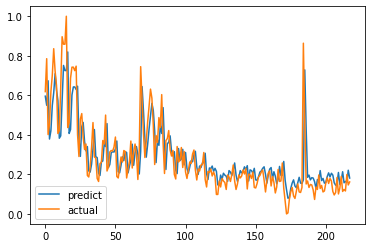

In [104]:
plt.plot(testPredict, label = 'predict')
plt.plot(testY, label = 'actual')
plt.legend()
plt.show()